In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('BlackFriday.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
del df['Product_Category_2']
del df['Product_Category_3']
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,7172


## Analysing columns

In [6]:
df['User_ID'].nunique()

5891

In [7]:
df['Product_ID'].nunique()

3623

In [8]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [9]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [10]:
df['Purchase'].sum()/len(df['Purchase'])

9333.859852635065

In [11]:
for column in df.columns:
    print(column,":" , df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


## Analysing gender column

In [12]:
data=pd.DataFrame({'Ratio' : [len(df[df['Gender']=='M']), len(df[df['Gender']=='F'])]}, index=['Male','Female'])

<Axes: ylabel='Ratio'>

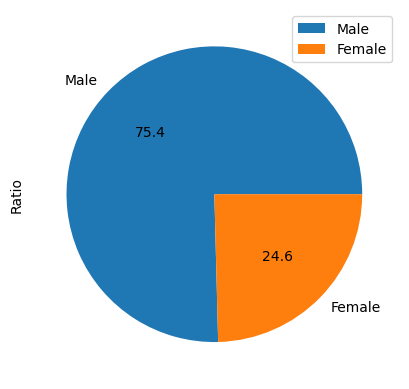

In [13]:
data.plot.pie(y='Ratio',autopct='%.1f')

<Axes: title={'center': 'Gender Ratio'}>

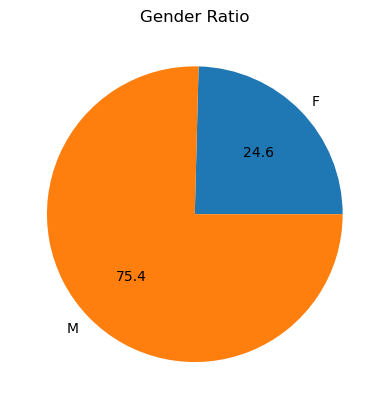

In [14]:
df.groupby('Gender').size().plot(kind='pie',autopct="%.1f",title='Gender Ratio')

<Axes: xlabel='Gender'>

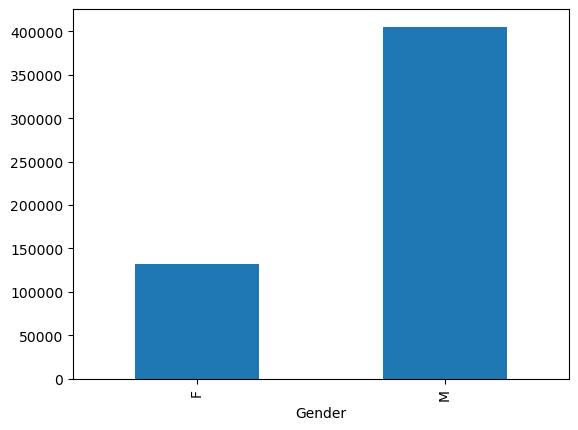

In [15]:
df.groupby('Gender').size().plot(kind='bar')

In [16]:
df.groupby('Gender').size()

Gender
F    132197
M    405380
dtype: int64

<Axes: ylabel='Purchase'>

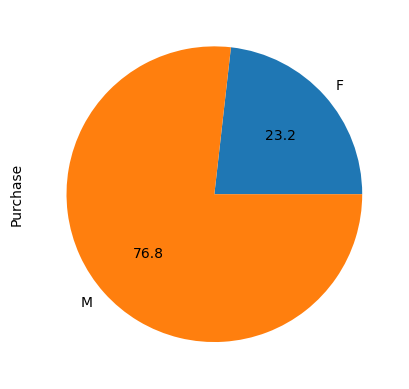

In [22]:
#money spent
df.groupby('Gender').sum()['Purchase'].plot(kind='pie',autopct="%0.1f")

<Axes: ylabel='Purchase'>

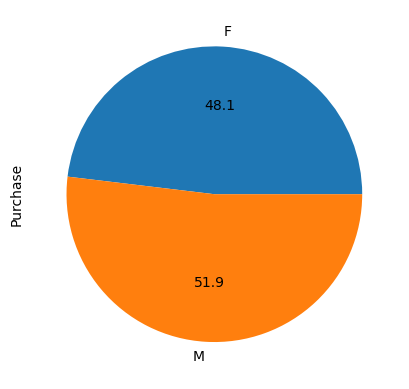

In [6]:
#avg value male & female spending per purchase
df.groupby('Gender')['Purchase'].mean().plot(kind='pie',autopct="%0.1f")

## Analyzing Age & marital status

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

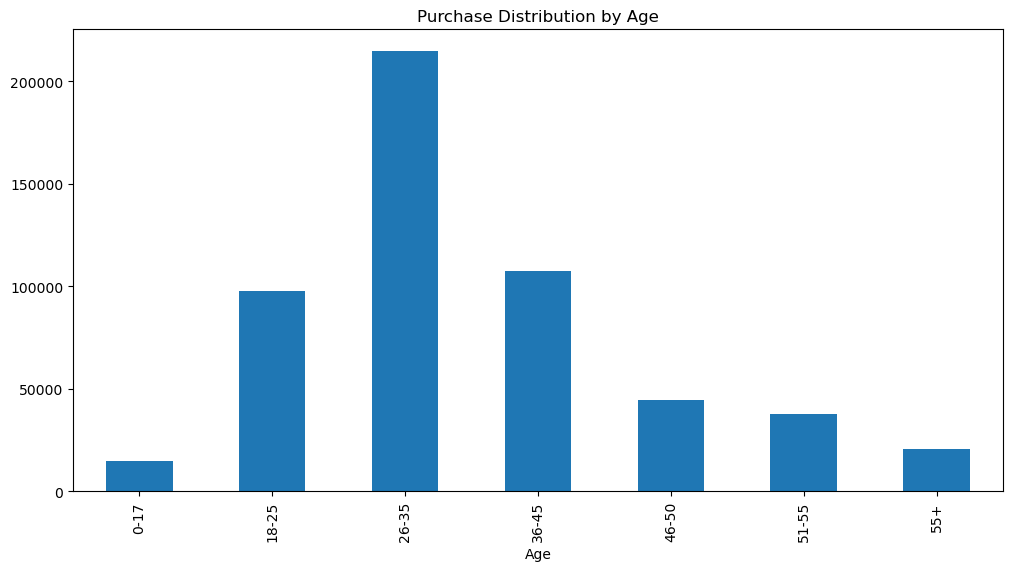

In [17]:
df.groupby('Age').size().plot(kind='bar',figsize=(12,6), title='Purchase Distribution by Age')

In [18]:
for i in df['Age'].unique():
    print(i,":",len(df[df['Age']==i]))

0-17 : 14707
55+ : 20903
26-35 : 214690
46-50 : 44526
51-55 : 37618
36-45 : 107499
18-25 : 97634


In [19]:
df[df['Age']==i]['Product_ID'].nunique()

3213

In [20]:
for i in df['Age'].unique():
    print(i,":",df[df['Age']==i]['Product_ID'].nunique())

0-17 : 2300
55+ : 2573
26-35 : 3419
46-50 : 3099
51-55 : 2877
36-45 : 3318
18-25 : 3213


In [21]:
lst=[]
for i in df['Age'].unique():
    lst.append([i,df[df['Age']==i]['Product_ID'].nunique()])
    
data=pd.DataFrame(lst,columns=['Age','Products'])
data

,Age,Products
0,0-17,2300
1,55+,2573
2,26-35,3419
3,46-50,3099
4,51-55,2877
5,36-45,3318
6,18-25,3213


<Axes: xlabel='Age'>

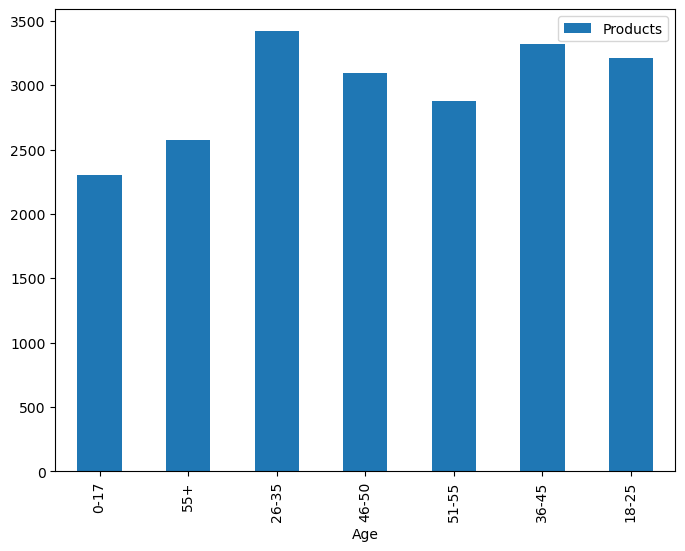

In [22]:
data.plot.bar(x='Age',figsize=(8,6))

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

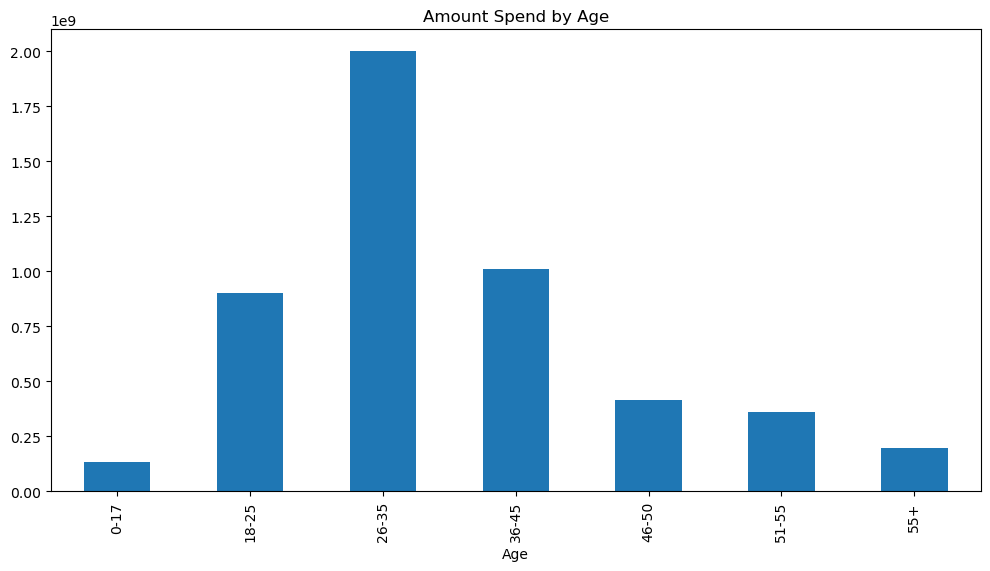

In [23]:
df.groupby('Age').sum()['Purchase'].plot(kind='bar',figsize=(12,6), title='Amount Spend by Age')

In [25]:
df['Purchase'].dtype

dtype('int64')

<Axes: title={'center': 'Amount Spend by Age'}, xlabel='Age'>

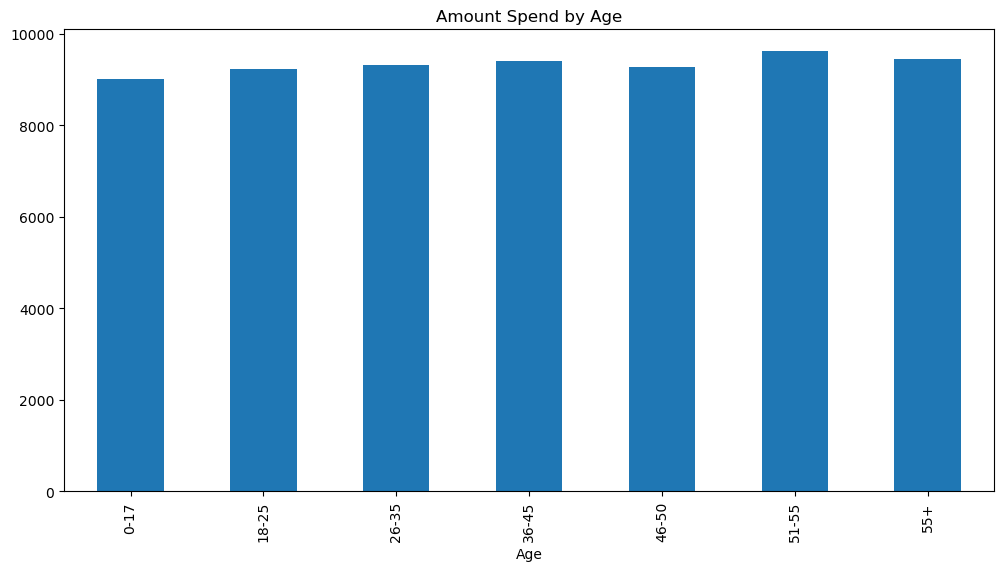

In [32]:
df.groupby('Age')['Purchase'].mean().plot(kind='bar',figsize=(12,6), title='Amount Spend by Age')

<Axes: ylabel='Purchase'>

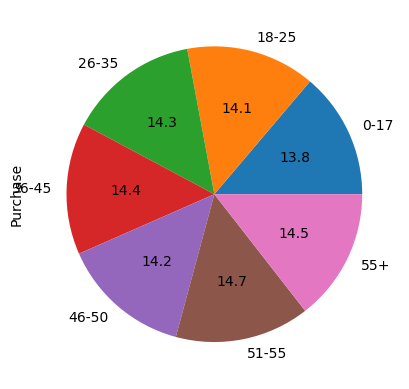

In [33]:
df.groupby('Age')['Purchase'].mean().plot(kind='pie',autopct='%0.1f')

<Axes: >

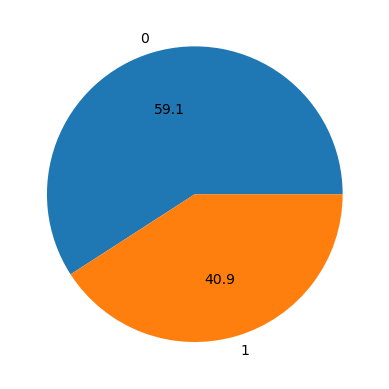

In [28]:
df.groupby('Marital_Status').size().plot(kind='pie',autopct='%0.1f')

<Axes: >

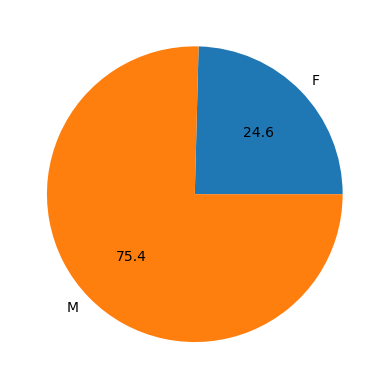

In [29]:
df.groupby('Gender').size().plot(kind='pie',autopct='%0.1f')

## Multi column analysis

<Axes: xlabel='Age', ylabel='count'>

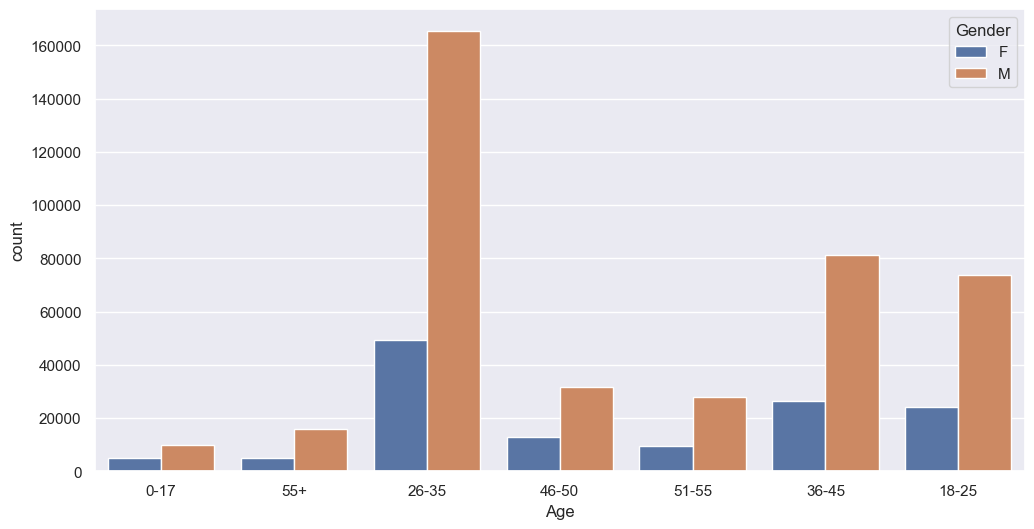

In [28]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Age",hue="Gender",data=df)

<Axes: xlabel='Gender', ylabel='count'>

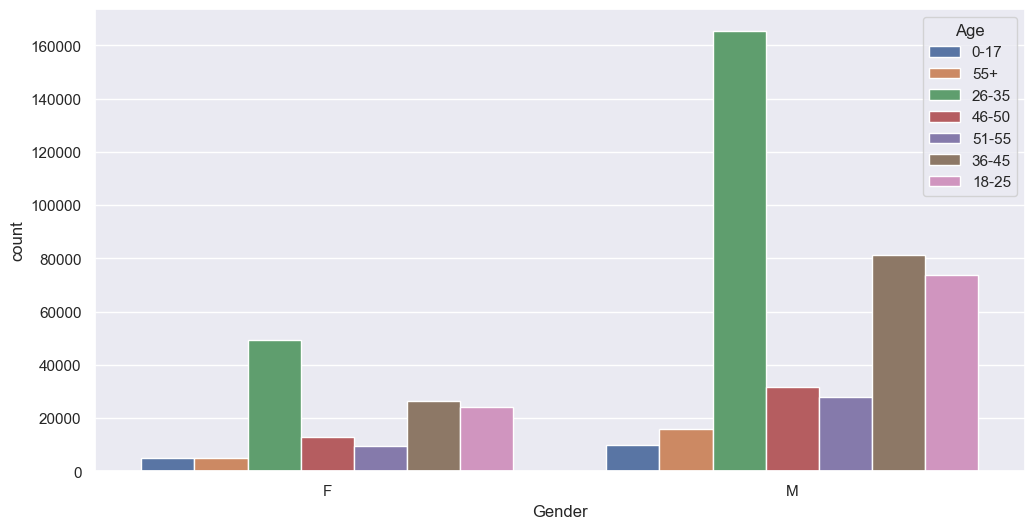

In [29]:
sns.set(rc={'figure.figsize':(12,6)})
sns.countplot(x="Gender",hue="Age",data=df)

<Axes: xlabel='Gender', ylabel='count'>

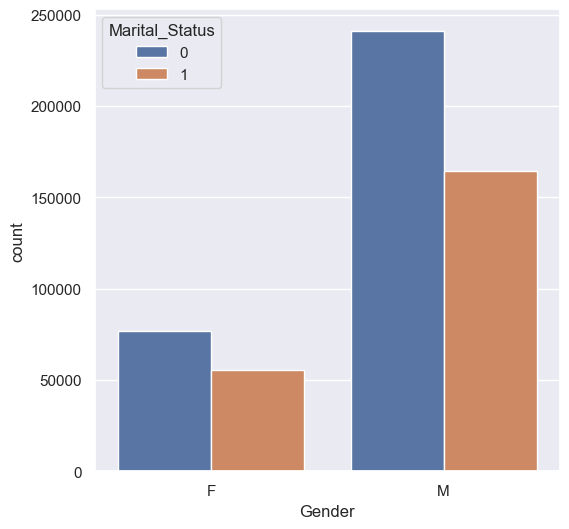

In [30]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x="Gender",hue="Marital_Status",data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

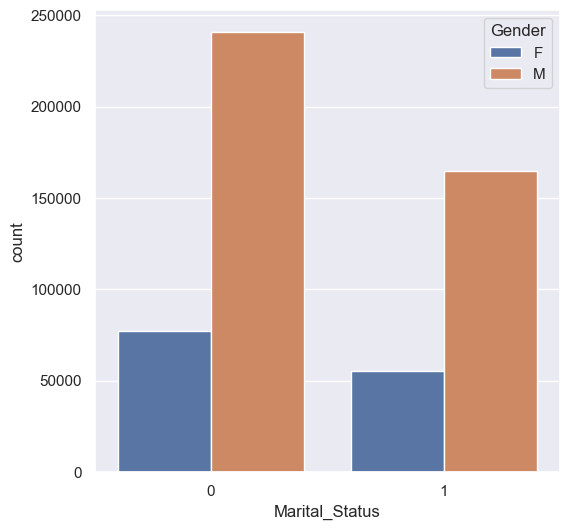

In [31]:
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x="Marital_Status",hue="Gender",data=df)

<Axes: xlabel='City_Category', ylabel='count'>

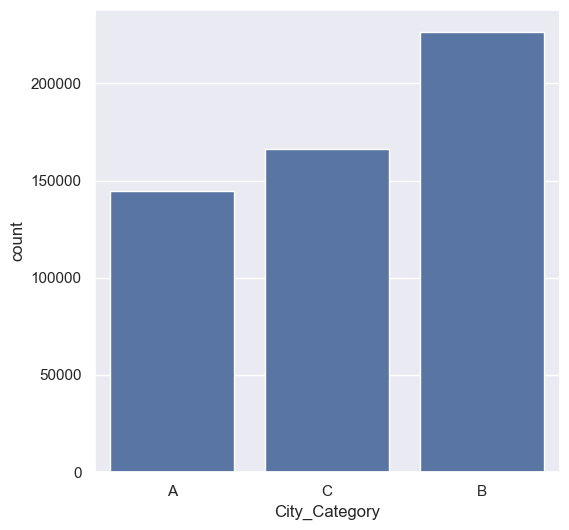

In [32]:
sns.countplot(x=df['City_Category'])

<Axes: xlabel='City_Category', ylabel='count'>

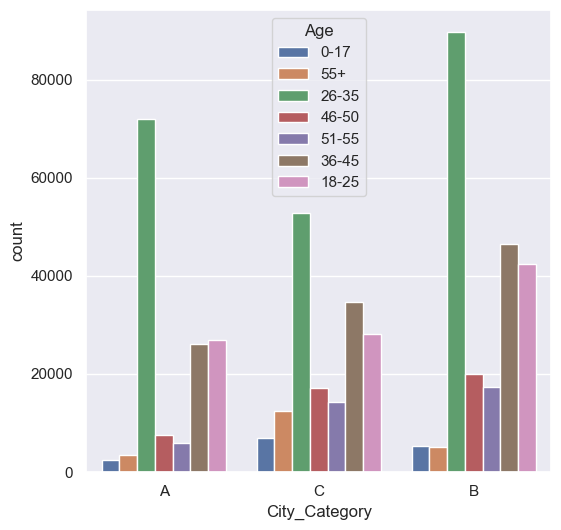

In [35]:
sns.countplot(x='City_Category',hue='Age',data=df)

<Axes: xlabel='Age', ylabel='count'>

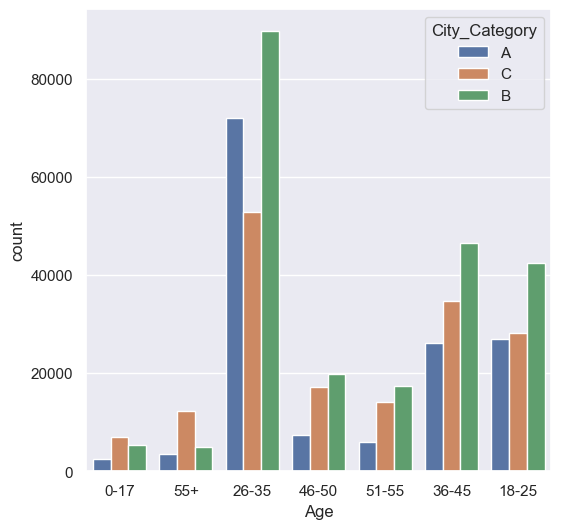

In [36]:
sns.countplot(x='Age',hue='City_Category',data=df)

<Axes: xlabel='Marital_Status', ylabel='count'>

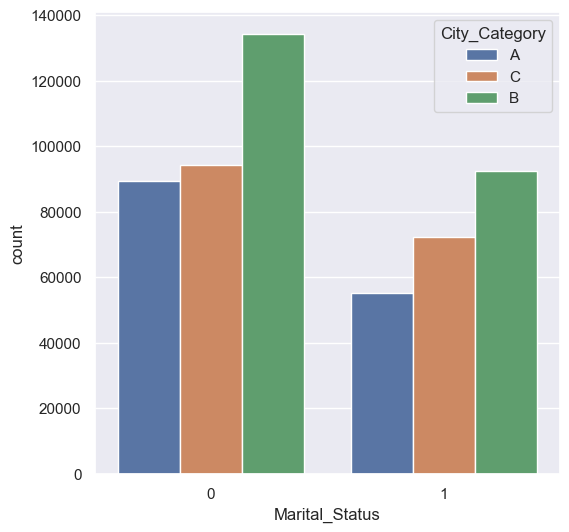

In [37]:
sns.countplot(x='Marital_Status',hue='City_Category',data=df)

<Axes: >

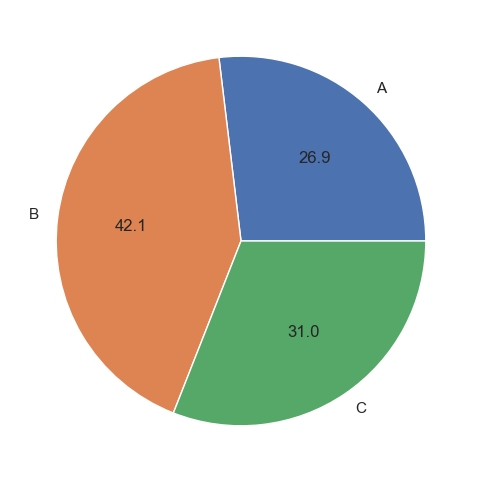

In [34]:
df.groupby('City_Category').size().plot(kind='pie',autopct='%0.1f')

<Axes: xlabel='City_Category', ylabel='count'>

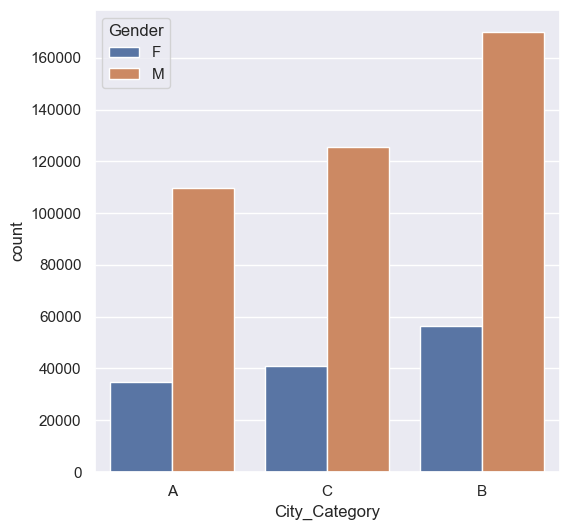

In [38]:
sns.countplot(x='City_Category',hue='Gender',data=df)

<Axes: ylabel='Purchase'>

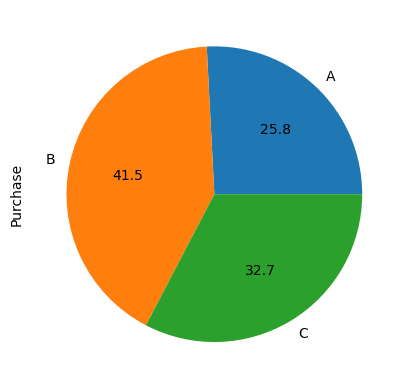

In [7]:
df.groupby('City_Category').sum()['Purchase'].plot(kind='pie',autopct='%0.1f')

<Axes: ylabel='Purchase'>

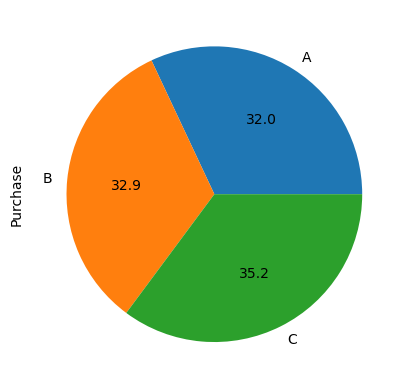

In [9]:
df.groupby('City_Category')['Purchase'].mean().plot(kind='pie',autopct='%0.1f')

## Occupation & products analysis

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

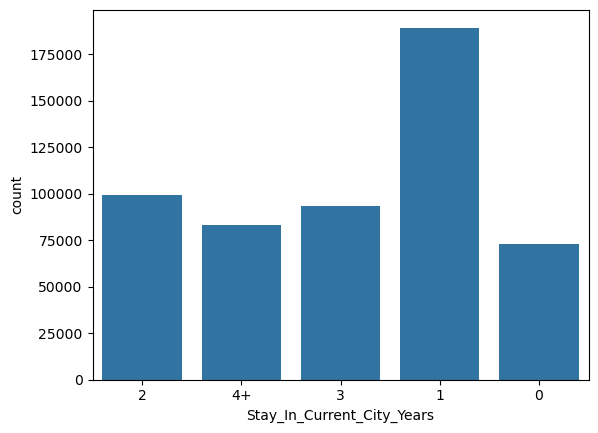

In [8]:
sns.countplot(x=df['Stay_In_Current_City_Years'])

<Axes: >

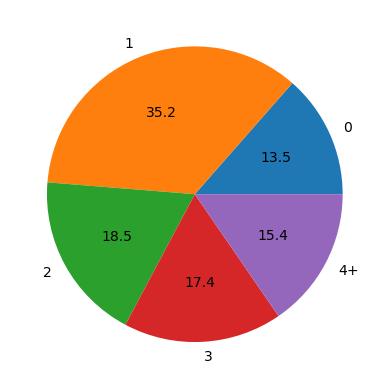

In [15]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind='pie',autopct='%0.1f')

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

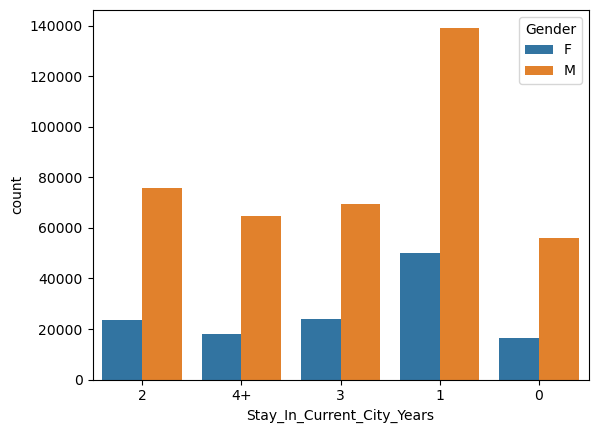

In [10]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Gender',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

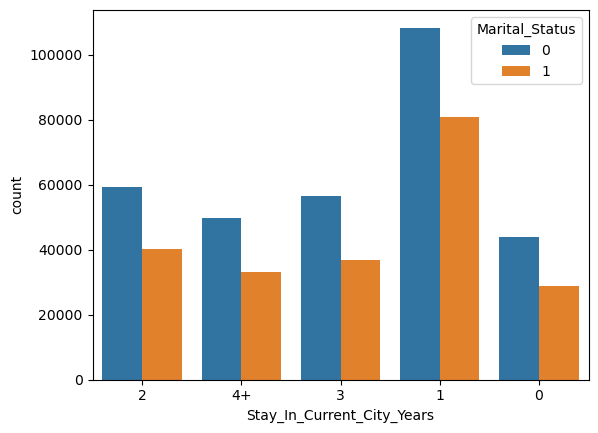

In [11]:
sns.countplot(x='Stay_In_Current_City_Years',hue='Marital_Status',data=df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

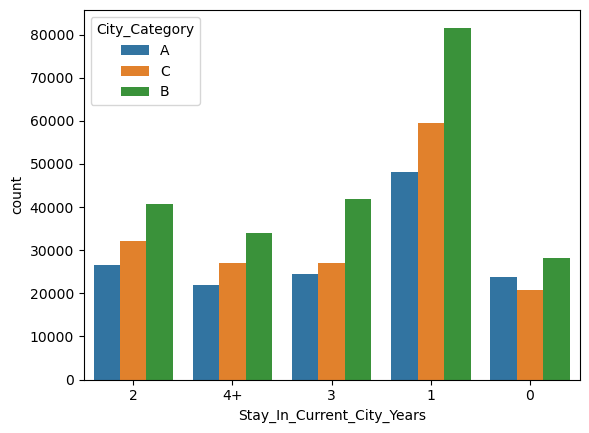

In [12]:
sns.countplot(x='Stay_In_Current_City_Years',hue='City_Category',data=df)

<Axes: xlabel='City_Category', ylabel='count'>

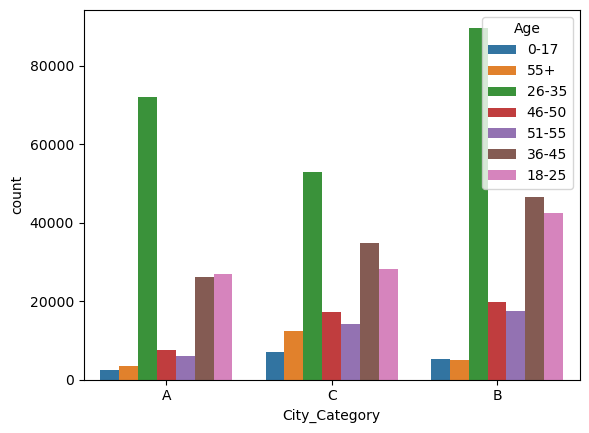

In [14]:
sns.countplot(x='City_Category',hue='Age',data=df)

<Axes: ylabel='Purchase'>

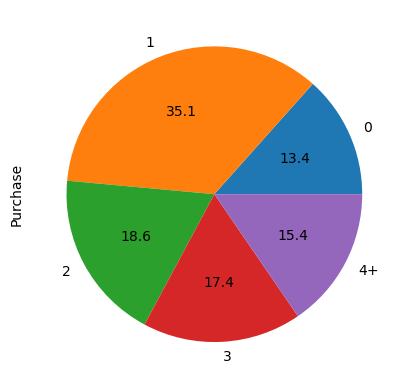

In [16]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='pie',autopct='%0.1f')

<Axes: xlabel='Stay_In_Current_City_Years'>

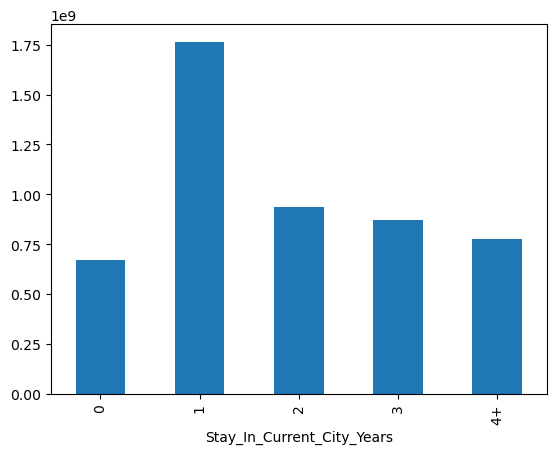

In [17]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind='bar')

<Axes: xlabel='Stay_In_Current_City_Years'>

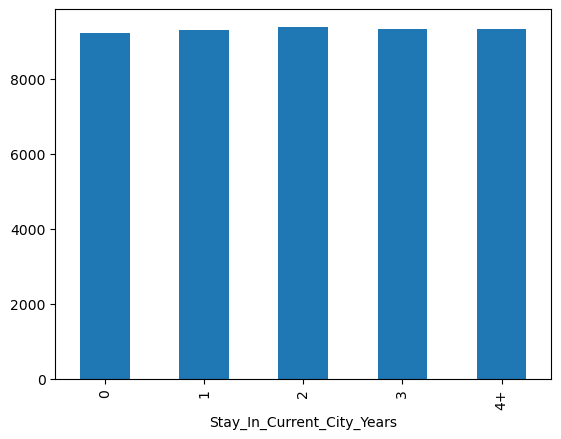

In [18]:
df.groupby('Stay_In_Current_City_Years')['Purchase'].mean().plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

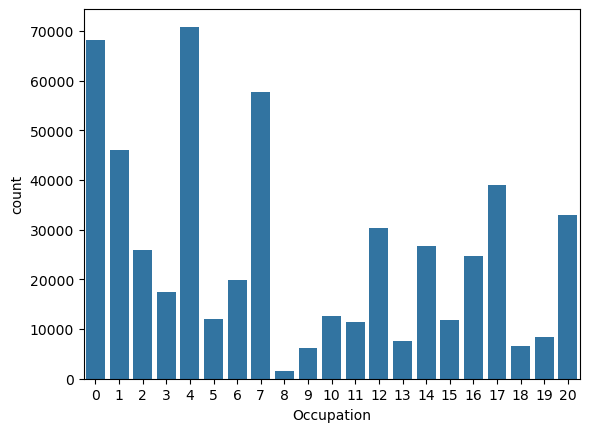

In [19]:
sns.countplot(x=df['Occupation'])

<Axes: xlabel='Occupation'>

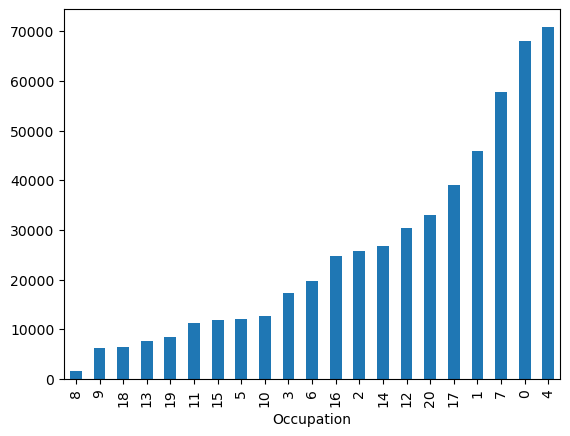

In [20]:
df.groupby('Occupation').size().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

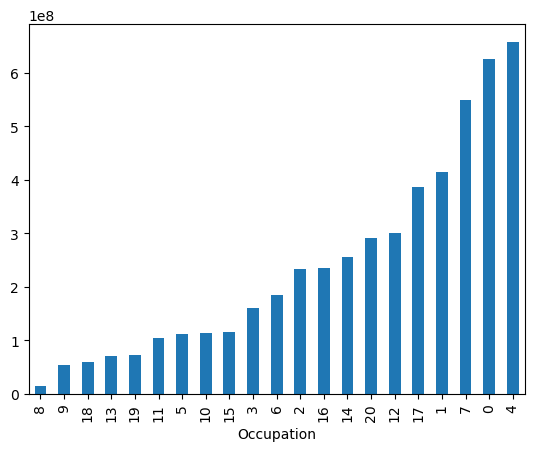

In [21]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind='bar')

<Axes: xlabel='Occupation'>

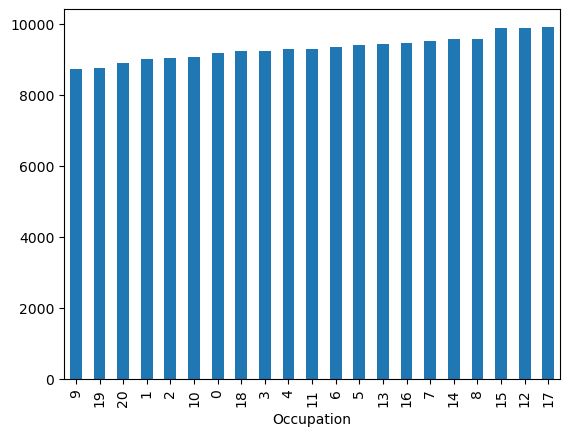

In [23]:
df.groupby('Occupation')['Purchase'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Occupation', ylabel='count'>

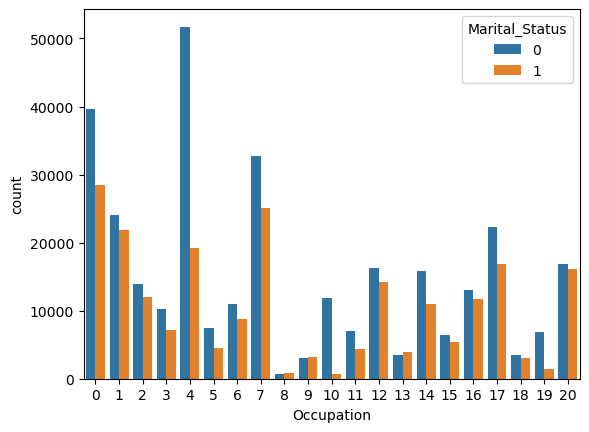

In [25]:
sns.countplot(x='Occupation',hue='Marital_Status',data=df)

<Axes: xlabel='Occupation', ylabel='count'>

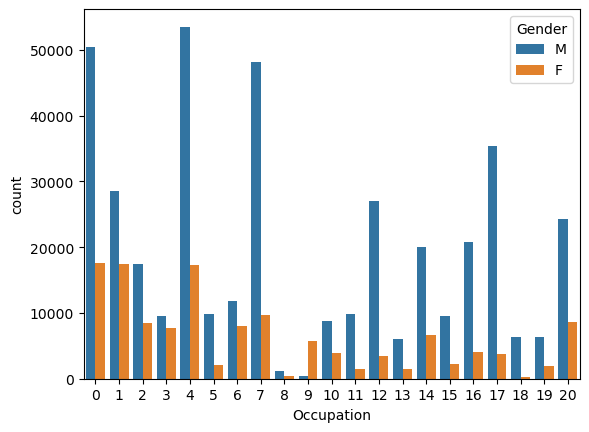

In [26]:
sns.countplot(x='Occupation',hue='Gender',data=df)

<Axes: xlabel='Occupation'>

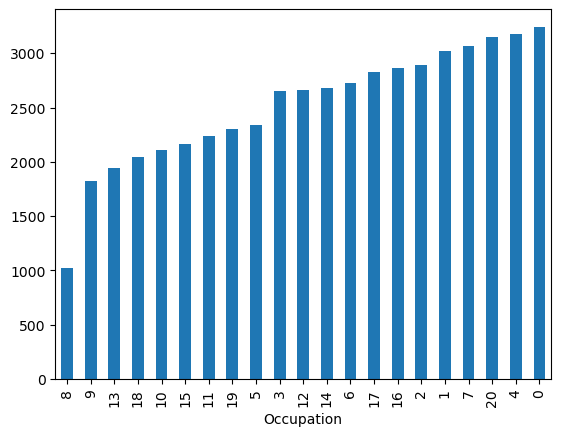

In [28]:
df.groupby('Occupation').nunique()['Product_ID'].sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

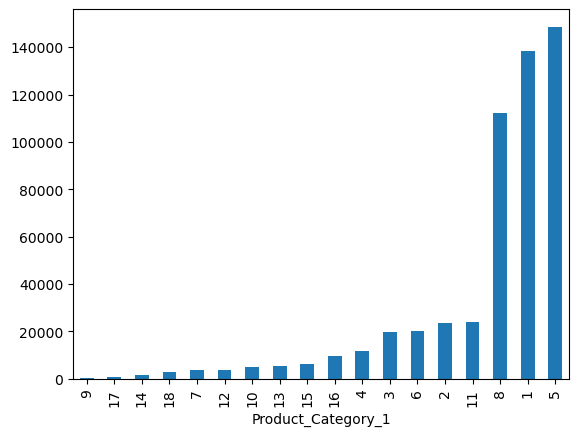

In [29]:
df.groupby('Product_Category_1').size().sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

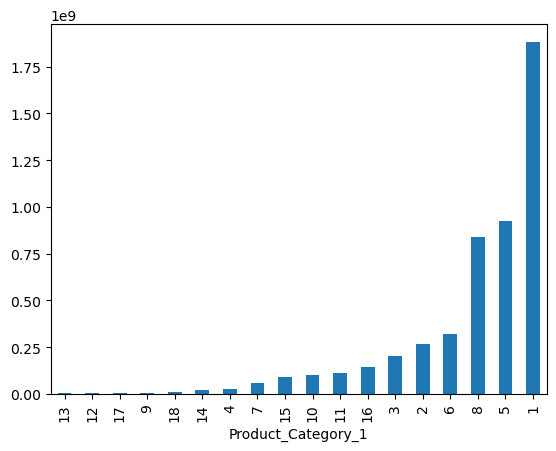

In [30]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1'>

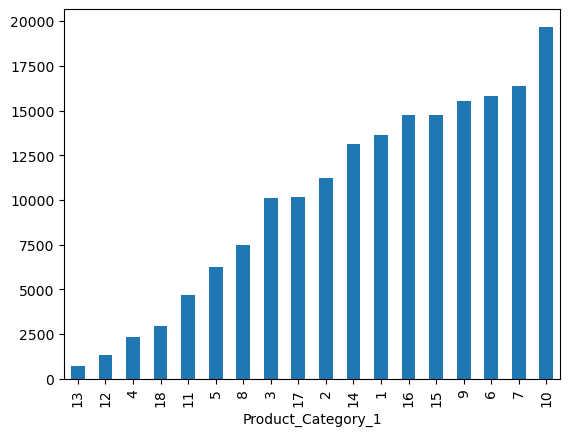

In [31]:
df.groupby('Product_Category_1')['Purchase'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

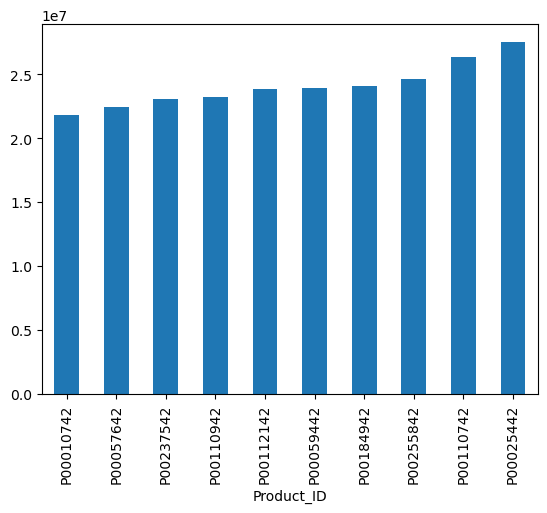

In [32]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

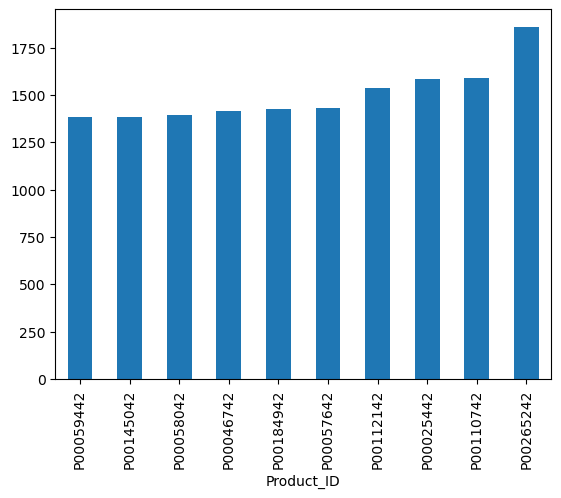

In [33]:
df.groupby('Product_ID').size().nlargest(10).sort_values().plot(kind='bar')

<Axes: xlabel='Product_ID'>

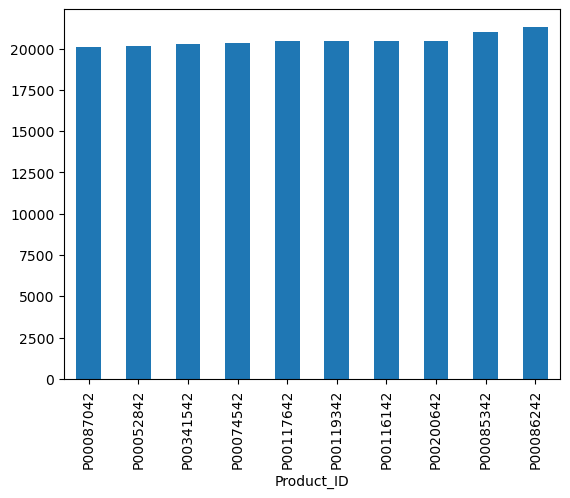

In [34]:
df.groupby('Product_ID')['Purchase'].mean().nlargest(10).sort_values().plot(kind='bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

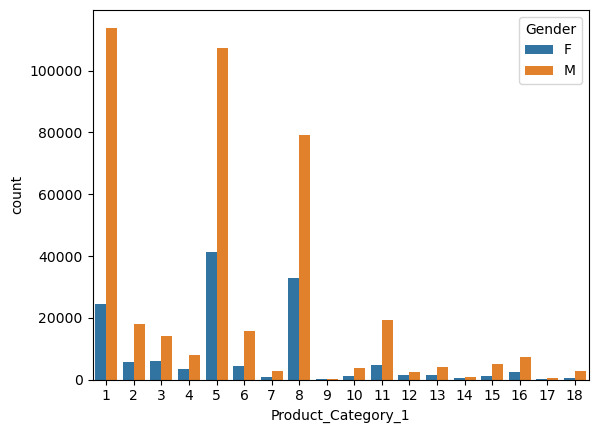

In [35]:
sns.countplot(x='Product_Category_1',hue='Gender',data=df)

<Axes: xlabel='Product_Category_1', ylabel='count'>

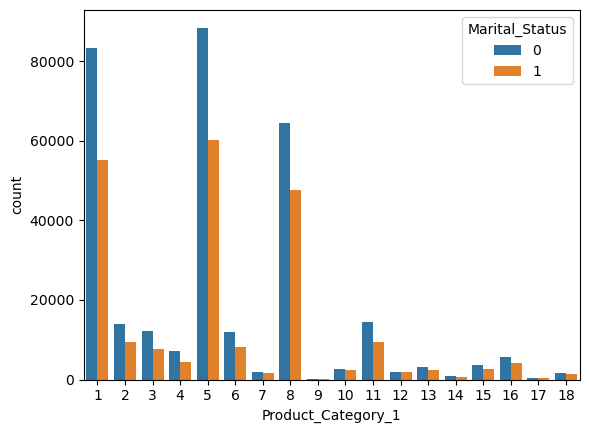

In [36]:
sns.countplot(x='Product_Category_1',hue='Marital_Status',data=df)

## Combining Gender & Marital status

In [40]:
l=[]
for i in range(len(df)):
    l.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender']=l

In [41]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase,MaritalGender
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,F_0
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,F_0
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,F_0
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,F_0
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969,M_0


<Axes: xlabel='MaritalGender', ylabel='count'>

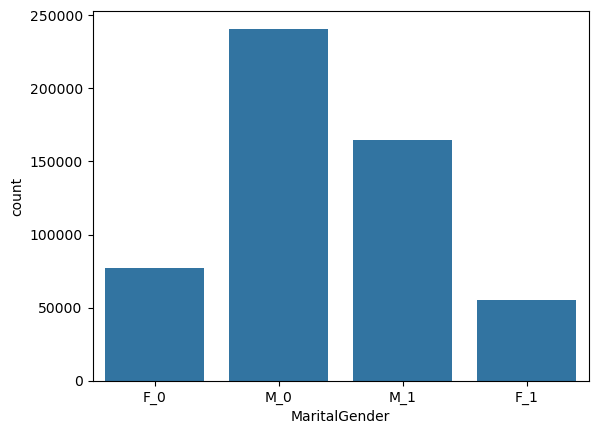

In [42]:
sns.countplot(x=df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

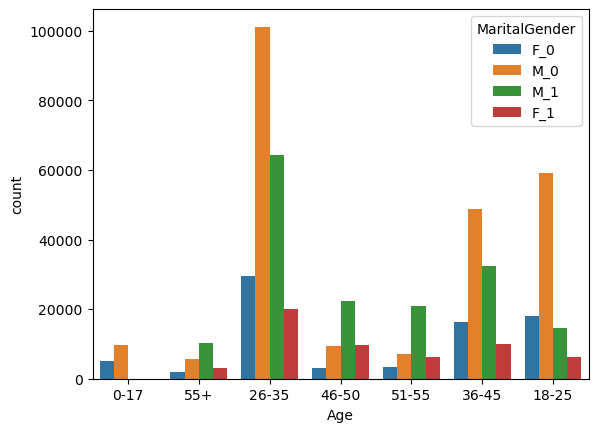

In [44]:
sns.countplot(x=df['Age'],hue=df['MaritalGender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

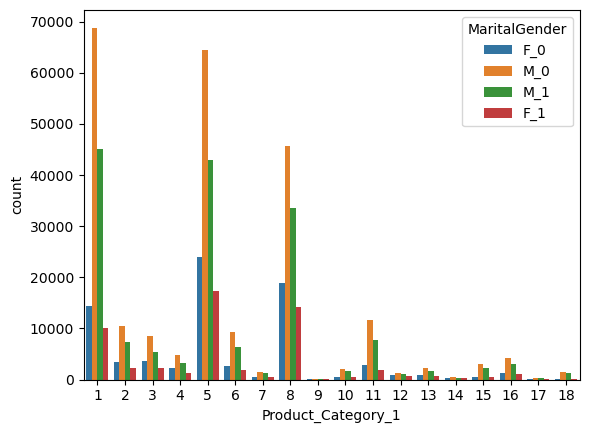

In [45]:
sns.countplot(x=df['Product_Category_1'],hue=df['MaritalGender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

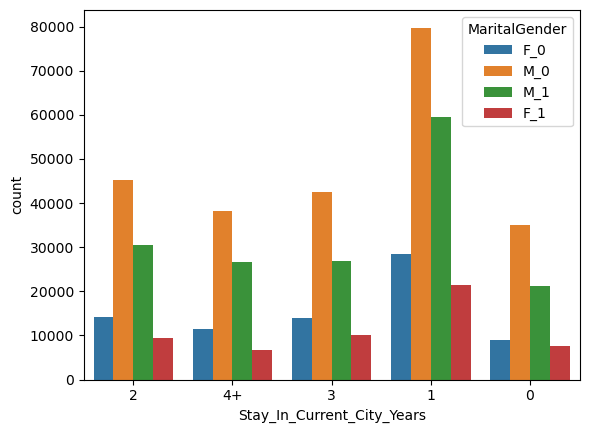

In [46]:
sns.countplot(x=df['Stay_In_Current_City_Years'],hue=df['MaritalGender'])

<Axes: xlabel='City_Category', ylabel='count'>

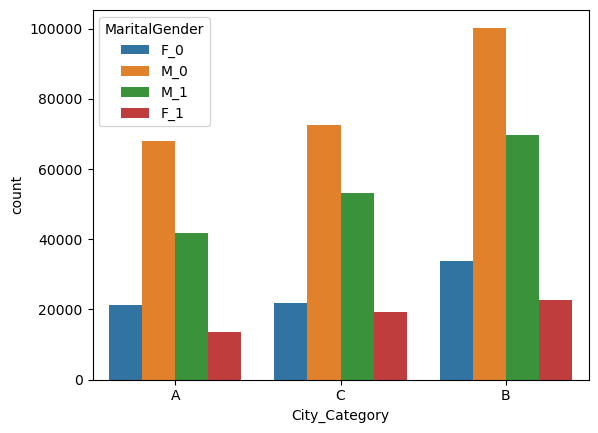

In [47]:
sns.countplot(x=df['City_Category'],hue=df['MaritalGender'])